In [244]:
import networkx as nx
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
import sys

# Input data
start_city = 'Panaji'
goal_city = 'Chennai'
max_depth = int(input("Enter the max depth for IDA* algorithm: "))

map_with_costs = {
    'Panaji': [('Mangalore', 365), ('Raichur', 457)],
    'Mangalore': [('Kozhikode', 233),('Panaji',365),('Bangalore',352)],
    'Kozhikode': [('Bangalore', 356),('Mangalore',233)],
    'Bangalore': [('Chennai', 346),('Bellari',153),('Kozhikode', 356),('Mangalore',352)],
    'Raichur': [('Tirupati', 453), ('Kurnool', 100),('Panaji',457)],
    'Tirupati': [('Bellari', 379), ('Chennai', 153),('Raichur',453)],
    'Bellari': [('Bangalore', 153),('Tirupati',379)],
    'Kurnool': [('Nellore', 325),('Raichur',100)],
    'Nellore': [('Chennai', 175),('Kurnool',325)]
}

city_coordinates = {
    'Panaji': (15.4909, 73.8278),
    'Raichur': (16.2076, 77.3463),
    'Mangalore': (12.9141, 74.8560),
    'Bellari': (15.1394, 76.9214),
    'Tirupati': (13.6288, 79.4192),
    'Kurnool': (15.8281, 78.0373),
    'Kozhikode': (11.2588, 75.7804),
    'Bangalore': (12.9716, 77.5946),
    'Nellore': (14.4426, 79.9865),
    'Chennai': (13.0827, 80.2707)
}
# Haversine Distance Function
def haversine_dis(coord1, coord2):
    R = 6371  # Radius of the Earth in kilometers

    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    dis = R * c  # Distance in kilometers
    return dis

# Calculate fitness function
def calculate_fitness(city, goal, dist, city_coordinates):
    haversine_dist_to_goal = haversine_dis(city_coordinates[city], city_coordinates[goal])
    fitness = dist + haversine_dist_to_goal
    return fitness
def ida_star_search(start, goal, max_depth, map_with_costs, city_coordinates):
    # Counters for time and space complexity
    
    max_neighbors = 0
    current_depth=max_depth
    
    def search(current_city, current_depth, total_distance, path, fitness):
        nonlocal goal, max_neighbors

        if current_city == goal:
            return path, total_distance

        if current_depth == 0:
            return None, total_distance

        neighbors = map_with_costs[current_city]
        
        min_fitness = float('inf')  # Initialize min_fitness to positive infinity
        
        for neighbor, distance in neighbors:
            new_total_distance =  total_distance + distance
            new_path = path + [neighbor]
            new_fitness = calculate_fitness(neighbor, goal, new_total_distance, city_coordinates)
            if new_fitness < min_fitness:  # Update min_fitness if a lower fitness value is encountered
                min_fitness = new_fitness
            max_neighbors = max(max_neighbors, len(neighbors))  # Update max_neighbors with the maximum number of neighbors encountered

        for neighbor, distance in neighbors:
            new_total_distance = total_distance + distance
            new_path = path + [neighbor]
            new_fitness = calculate_fitness(neighbor, goal, new_total_distance, city_coordinates)
            if new_fitness == min_fitness:  # Consider only nodes with minimum fitness value
                IDA_star_path, result_distance = search(neighbor, (current_depth - 1), new_total_distance, new_path, new_fitness)
                if IDA_star_path is not None:
                    return IDA_star_path,max_neighbors
      

        return None, total_distance
    
   
    current_depth = max_depth
    path = [start_city]
    total_distance = 0
    start_fitness = calculate_fitness(start_city, goal, total_distance, city_coordinates)
    
    while current_depth >= 0:
        IDA_star_path, total_distance = search(start_city, current_depth, total_distance, path, start_fitness)

        if IDA_star_path is not None:
            return IDA_star_path, max_neighbors

        current_depth -= 1

    print("In the specified depth, there is no valid path found.")
    return None

def calculate_total_path_cost(path, map_with_costs):
    total_cost = sum(cost for city, next_city in zip(path, path[1:]) for neighbor, cost in map_with_costs[city] if neighbor == next_city)
    return total_cost
# Pathfinding using IDA* algorithm
time_complexity=0
space_Complexity=0
result = ida_star_search(start_city, goal_city, max_depth, map_with_costs, city_coordinates)

if result is not None:
    IDA_star_path, branching_factor = result
    time_complexity  = branching_factor ** max_depth
    space_Complexity = branching_factor * max_depth
    print("\nIDA* Algorithm Result -")
    print("Shortest path from", start_city, "to", goal_city, "using IDA*:")
    print(" -> ".join(IDA_star_path))
    print(f'Total Path Cost: {calculate_total_path_cost(IDA_star_path, map_with_costs)}\n')
    print(f'Time Complexity: {time_complexity}\nSpace Complexity: {space_Complexity}')
    
else:
    # Handle the case when ida_star_search returns None
    print("No solution found")

Enter the max depth for IDA* algorithm: 5

IDA* Algorithm Result -
Shortest path from Panaji to Chennai using IDA*:
Panaji -> Raichur -> Kurnool -> Nellore -> Chennai
Total Path Cost: 1057

Time Complexity: 243
Space Complexity: 15


In [211]:
def hill_climbing_algo(start_city, goal_city, map_with_costs, city_coordinates):
    current_city = start_city
    total_haversine_distance = 0
    total_path_cost = 0
    path = [start_city]
    iterations=0
    while True:
        neighbors = map_with_costs[current_city]
        iterations+=1
        # Calculate the heuristic value for each neighboring city
        heuristic_values = {neighbor: haversine_dis(city_coordinates[neighbor], city_coordinates[goal_city]) for neighbor, _ in neighbors}

        # Select the neighboring city with the minimum heuristic value
        next_city = min(heuristic_values, key=heuristic_values.get)
        min_distance_to_goal = heuristic_values[next_city]

        if next_city:
            # Calculate the actual cost to the next city
            for neighbor, cost in neighbors:
                if neighbor == next_city:
                    total_haversine_distance += min_distance_to_goal  # Update total haversine distance
                    total_path_cost += cost  # Update total path cost
                    break
            
            current_city = next_city
            path.append(current_city)
        else:
            print("No valid path found.")
            return None

        if current_city == goal_city:
            break

    return path, {'haversine': total_haversine_distance, 'path_cost': total_path_cost},iterations

# Pathfinding using Hill Climbing algorithm
path, total_distance,iter_ = hill_climbing_algo(start_city, goal_city, map_with_costs, city_coordinates)

# Output the results
if path is not None:
    print("\nHill Climbing Algorithm Result -")
    print("Shortest path from", start_city, "to", goal_city, "using Hill Climbing:")
    print(" -> ".join(path))
    print("Total Haversine distance:", total_distance['haversine'], "km")
    print("Total Path Cost:", total_distance['path_cost'],'\n')
    
space_complexity = (len(path)-1)  # Number of visited nodes
time_complexity  = iter_  # Number of iterations
print("Hill Climbing Algorithm Complexity:")
print("Space Complexity:", space_complexity)
print("Time Complexity:", time_complexity)





Hill Climbing Algorithm Result -
Shortest path from Panaji to Chennai using Hill Climbing:
Panaji -> Raichur -> Tirupati -> Chennai
Total Haversine distance: 579.0434937546694 km
Total Path Cost: 1063 

Hill Climbing Algorithm Complexity:
Space Complexity: 3
Time Complexity: 3


In [225]:
import matplotlib.pyplot as plt

def plot_decision_tree_progress(start_city, goal_city, map_with_costs, city_coordinates, total_distance):
    plt.figure(figsize=(10, 6))  # Adjusted figure size

    # Plot all cities
    for city, neighbors in map_with_costs.items():
        if city == start_city:
            node_color = 'green'  # Color for the start city
        elif city == goal_city:
            node_color = 'red'  # Color for the goal city
        else:
            node_color = 'lightblue'  # Color for other nodes
            
        plt.scatter(city_coordinates[city][1], city_coordinates[city][0], color=node_color, s=200)  # Smaller node size
        plt.text(city_coordinates[city][1], city_coordinates[city][0],f"{city}\nH(n): {haversine_dis(city_coordinates[city], city_coordinates[goal_city]):.2f} km" , fontsize=8, ha='center', va='center', bbox=dict(facecolor=node_color, edgecolor='black', boxstyle='round,pad=0.3'))

    # Plot connections between cities and label path cost
    for city, neighbors in map_with_costs.items():
        for neighbor, cost in neighbors:
            plt.plot([city_coordinates[city][1], city_coordinates[neighbor][1]], [city_coordinates[city][0], city_coordinates[neighbor][0]], color='black', linewidth=1)
            plt.text((city_coordinates[city][1] + city_coordinates[neighbor][1]) / 2, (city_coordinates[city][0] + city_coordinates[neighbor][0]) / 2, f"{cost}", fontsize=8, fontweight='bold', ha='center', va='center')

    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.title('Decision Tree Progress', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with dashed style
    plt.gca().set_facecolor('#f2f2f2')  # Set background color
    plt.tight_layout()
    plt.show()


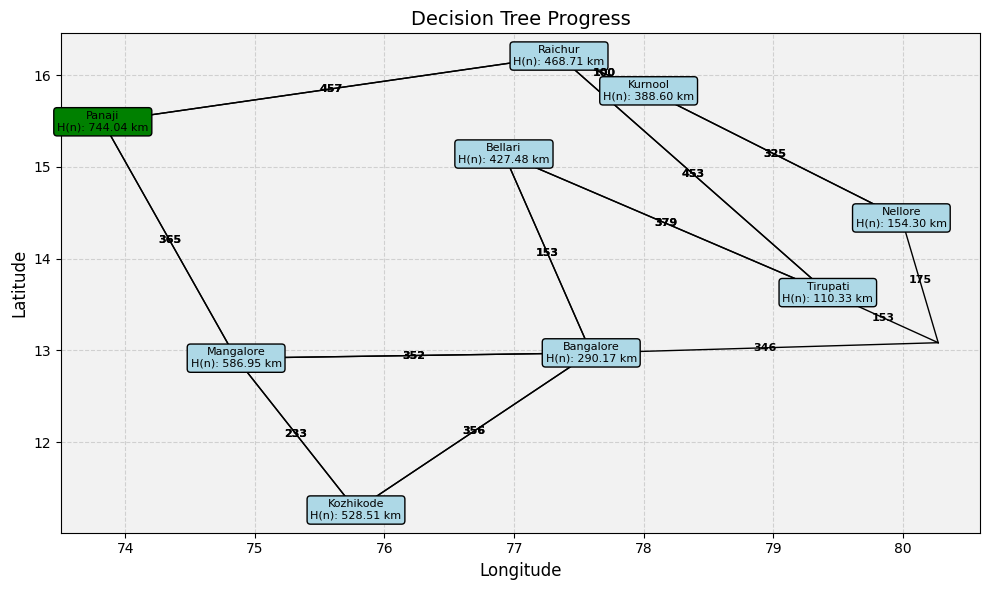

In [226]:
# Plot all nodes and connections
plot_decision_tree_progress(start_city, goal_city, map_with_costs, city_coordinates, total_distance)